Kawasaki Quantum Summer Camp 2024

# 量子ハードウェア：解答例


Kifumi Numata, IBM Quantum (Jul 31, 2024)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rustworkx as rx
import statistics

from qiskit_ibm_runtime import QiskitRuntimeService

### バックエンドの情報をみる

Qiskitは、量子デバイスに関する情報を取得するためのAPI ([アプリケーション・プログラミング・インタフェース](https://ja.wikipedia.org/wiki/%E3%82%A2%E3%83%97%E3%83%AA%E3%82%B1%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%82%A4%E3%83%B3%E3%82%BF%E3%83%95%E3%82%A7%E3%83%BC%E3%82%B9))を提供しています。デバイスとのインターフェースである、Backend命令を使用を使って、IBM Quantum Platformの[デバイスカード](https://quantum.ibm.com/services/resources)に表示される情報の一部を取得してみましょう。以下では、"ibm_kyoto" を選びます。

In [2]:
service = QiskitRuntimeService()
backend = service.backend("ibm_kyoto")

まず、デバイスに関する基本的な情報から見てみます。

In [3]:
print(
    f"""
{backend.name}, {backend.num_qubits} qubits
processor type = {backend.processor_type} 
basis gates = {backend.basis_gates}
""")


ibm_kyoto, 127 qubits
processor type = {'family': 'Eagle', 'revision': 3} 
basis gates = ['ecr', 'id', 'rz', 'sx', 'x']



#### 演習 1

別のデバイス "ibm_osaka" の基本情報を取得してみてください。

In [4]:
an_eagle = service.backend("ibm_osaka") 

# ここにコードを入れます
print(
    f"""
{backend.name}, {an_eagle.num_qubits} qubits
processor type = {an_eagle.processor_type} 
basis gates = {an_eagle.basis_gates}
""")


ibm_kyoto, 127 qubits
processor type = {'family': 'Eagle', 'revision': 3} 
basis gates = ['ecr', 'id', 'rz', 'sx', 'x']



### カップリング・マップ

次にデバイスのカップリング・マップを表示します。ご覧のように、ノード（頂点）が量子ビットで、番号が振られています。エッジ（辺）は、2量子ビットのエンタングルゲートが直接適用できるペアを示しています。このトポロジーはヘビーヘックス格子と呼ばれます。


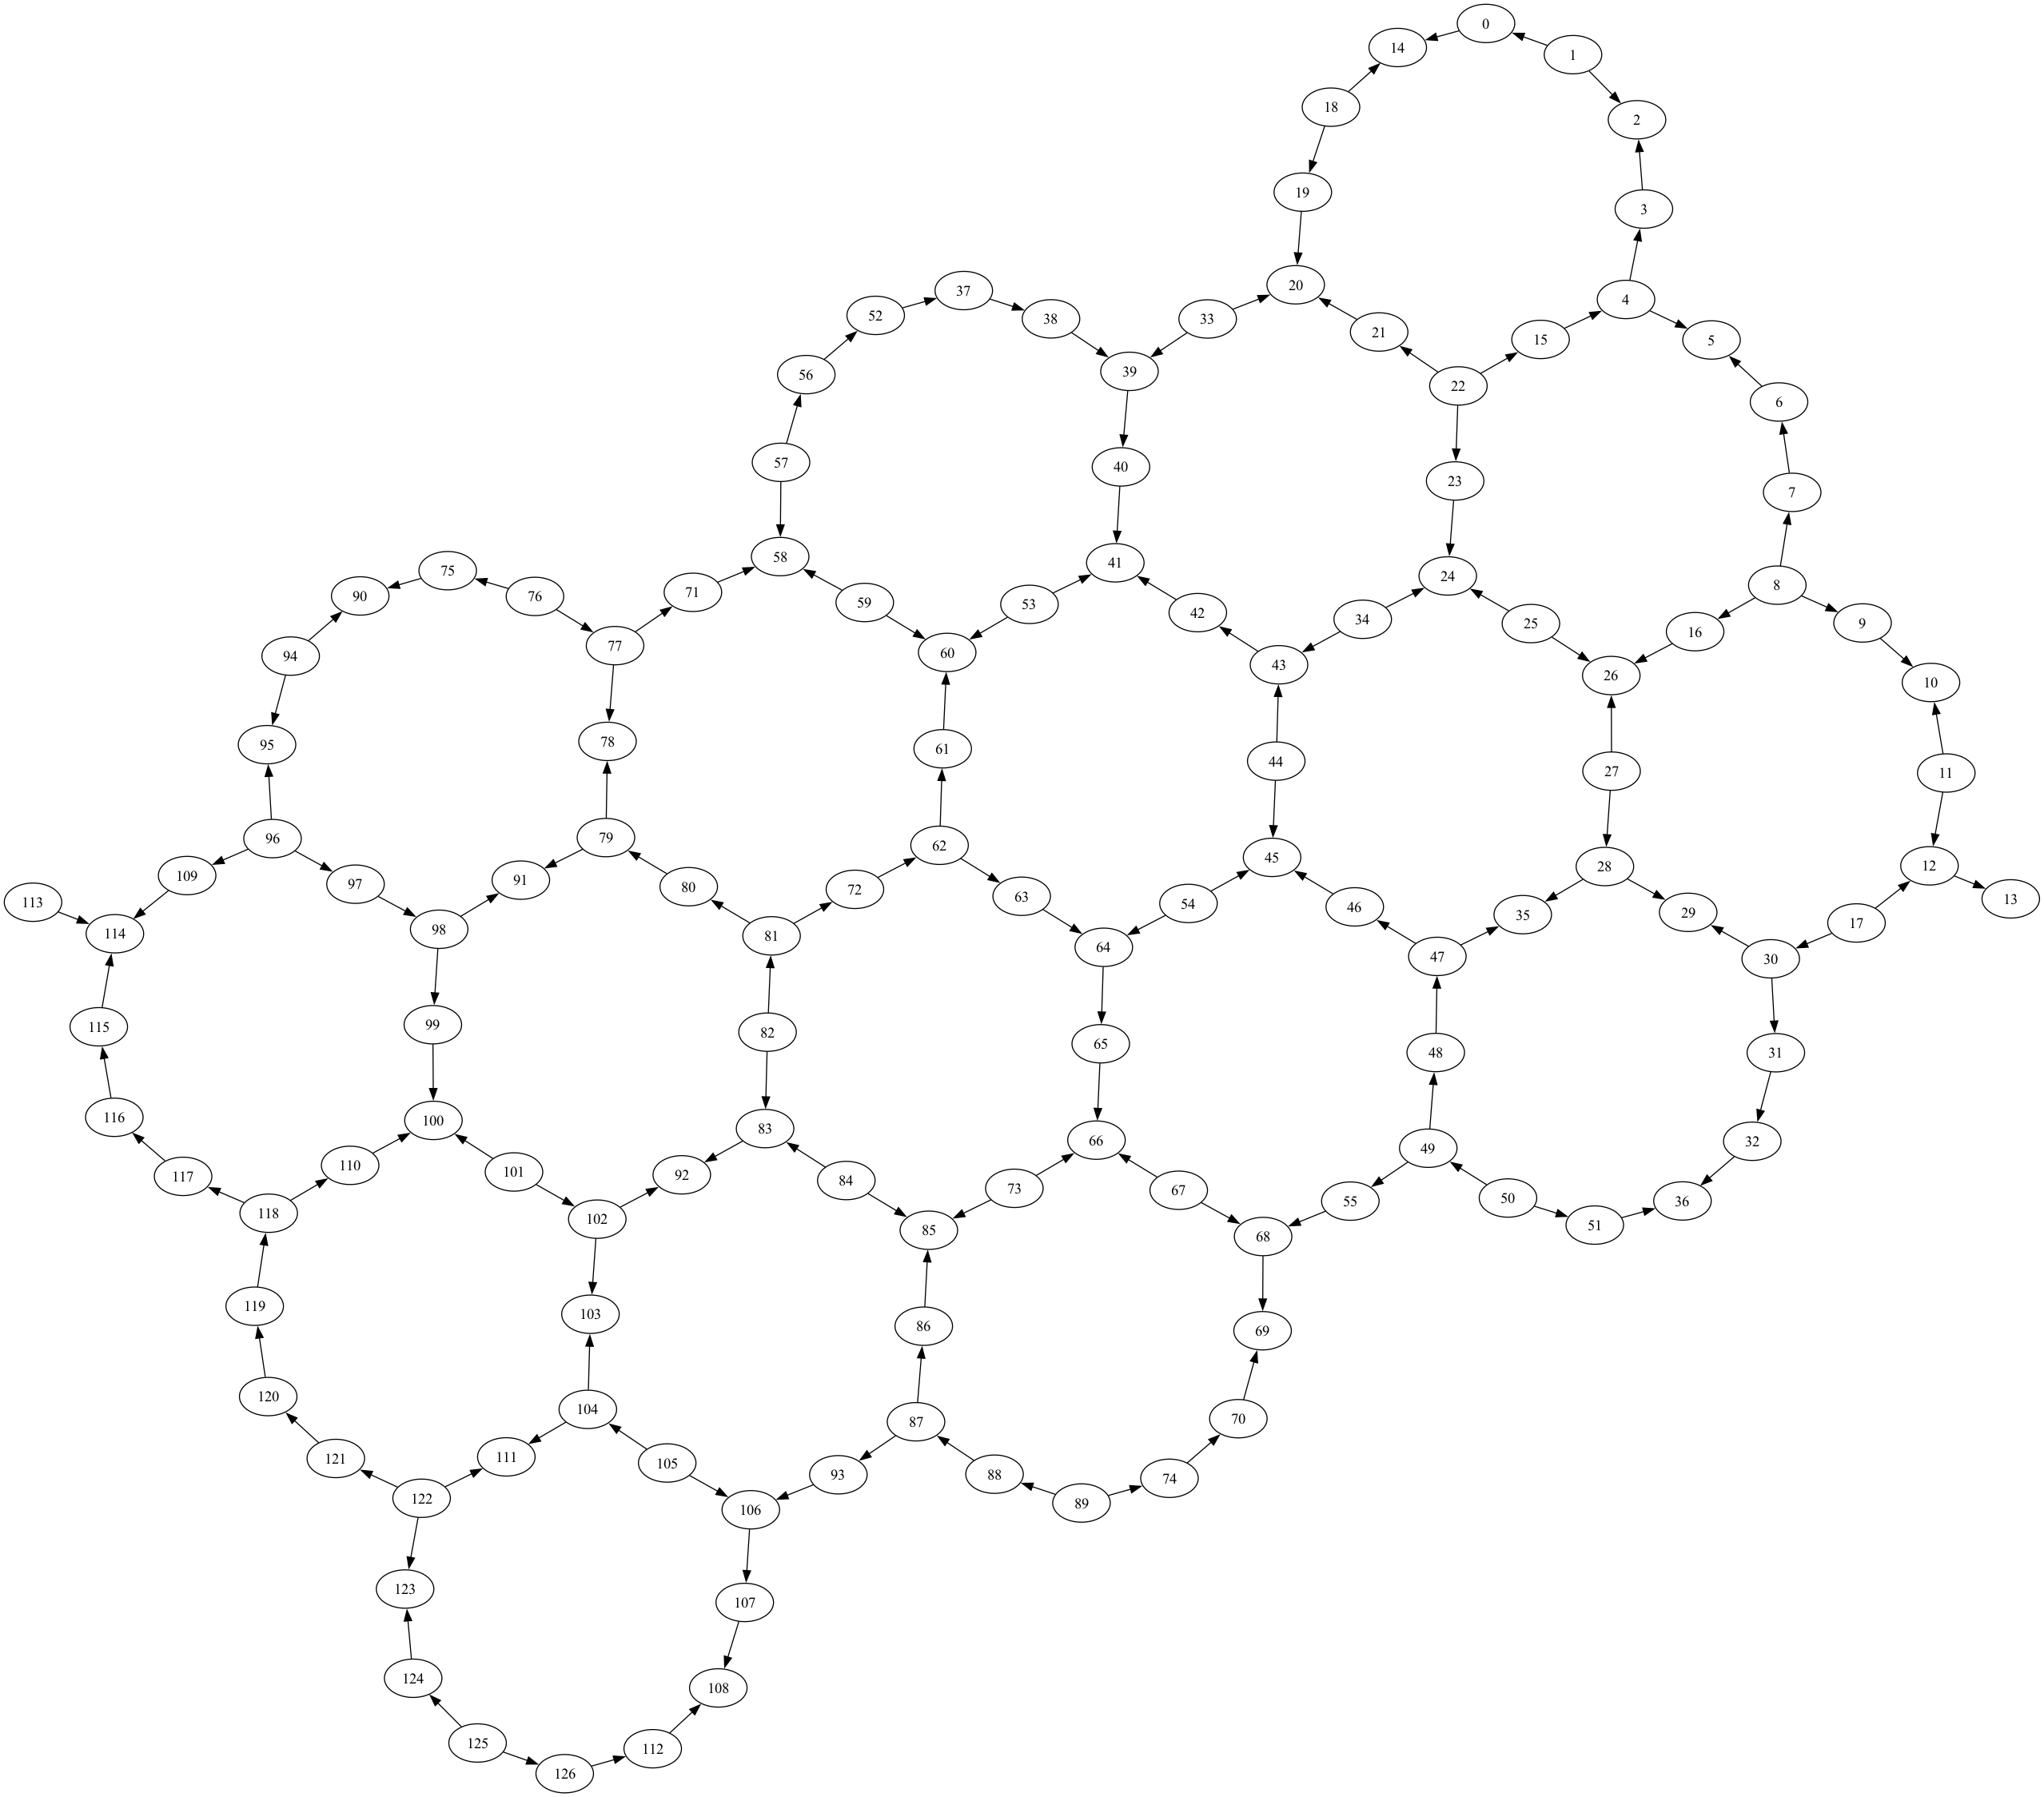

In [5]:
backend.coupling_map.draw()

### 量子ビットの特性

Eagle デバイスには127個の量子ビットがあります。そのいくつかの特性(Properties)を`qubit_properties`を使って、求めてみましょう。0~4までの5量子ビットのみ表示します。

In [6]:
for qn in range(backend.num_qubits):
    if (qn>=5):
        break
    print(f"{qn}: {backend.qubit_properties(qn)}")

0: QubitProperties(t1=0.0001631648717195973, t2=2.0716702558716345e-05, frequency=4908575180.528314)
1: QubitProperties(t1=0.00015860878122560414, t2=8.879813227452297e-05, frequency=4855717528.208175)
2: QubitProperties(t1=0.00020227703977564166, t2=4.9968797911365364e-05, frequency=4733162111.537341)
3: QubitProperties(t1=0.00020049333209823608, t2=4.920931118834076e-05, frequency=4820136704.408551)
4: QubitProperties(t1=0.0001621429593428973, t2=5.965703169814916e-05, frequency=4854357284.213127)


各量子ビットごとのT1時間、T2時間、共鳴周波数が確認できました。    
量子ビットのT1時間の[中央値](https://ja.wikipedia.org/wiki/%E4%B8%AD%E5%A4%AE%E5%80%A4) (Median)を計算してみましょう。[IBM Quantum Platfrom](https://quantum.ibm.com/services/resources)のデバイスの結果と比較してみてください。

In [7]:
t1s = [backend.qubit_properties(qq).t1 for qq in range(backend.num_qubits)] #t1をリスト化
t1_m = statistics.median(t1s)*10**6 #中央値を求め、10の６乗をかけて単位をμsに。

print(f'Median T1: {t1_m:.2f}μs') #有効数字小数点以下２桁

Median T1: 206.98μs


#### 演習 2

量子ビットのT2時間の中央値を計算してください。

In [8]:
t2s = [backend.qubit_properties(qq).t2 for qq in range(backend.num_qubits)] #t2をリスト化
t2_m = statistics.median(t2s)*10**6 #中央値を求め、10の６乗をかけて単位をμsに。

print(f'Median T2: {t2_m:.2f}μs') #有効数字小数点以下２桁

Median T2: 87.98μs


###  ゲートエラーと読み出しエラー

次にゲートエラーについて見てみます。まずはじめに、backendのtargetのデータ構造を調べます。演算の名前をキーとする[辞書](https://utokyo-ipp.github.io/3/3-1.html)になっています。

In [9]:
target = backend.target
target.keys()

dict_keys(['if_else', 'reset', 'for_loop', 'ecr', 'id', 'switch_case', 'rz', 'measure', 'delay', 'sx', 'x'])

その値も辞書です。'sx' 演算の値（辞書）の項目を5個目まで見てみましょう。

In [10]:
for i, qq in enumerate(target['sx']):
    if (i>=5):
        break
    print(i, qq, target['sx'][qq])

0 (0,) InstructionProperties(duration=6e-08, error=0.0007135743883670994, calibration=PulseQobj)
1 (1,) InstructionProperties(duration=6e-08, error=0.00027956949832471745, calibration=PulseQobj)
2 (2,) InstructionProperties(duration=6e-08, error=0.00029319250928552305, calibration=PulseQobj)
3 (3,) InstructionProperties(duration=6e-08, error=0.00055303138515316, calibration=PulseQobj)
4 (4,) InstructionProperties(duration=6e-08, error=0.0013308426126132427, calibration=PulseQobj)


演算の持続時間(duration)、エラー率、キャリブレーションの形式をみることができました。

'ecr' 演算と 'measure' 演算についても同じようにみてみましょう。

In [11]:
for i, edge in enumerate(target['ecr']):
    if (i>=5):
        break
    print(i, edge, target['ecr'][edge])

0 (0, 14) InstructionProperties(duration=6.6e-07, error=0.01155553284289454, calibration=PulseQobj)
1 (1, 0) InstructionProperties(duration=6.6e-07, error=0.02179163243428578, calibration=PulseQobj)
2 (1, 2) InstructionProperties(duration=6.6e-07, error=0.012231455273054831, calibration=PulseQobj)
3 (3, 2) InstructionProperties(duration=6.6e-07, error=0.009734396495512748, calibration=PulseQobj)
4 (4, 3) InstructionProperties(duration=6.6e-07, error=0.03705411095745742, calibration=PulseQobj)


In [12]:
for i, qq in enumerate(target['measure']):
    if (i>=5):
        break
    print(i, qq, target['measure'][qq])

0 (0,) InstructionProperties(duration=1.4e-06, error=0.2116, calibration=PulseQobj)
1 (1,) InstructionProperties(duration=1.4e-06, error=0.10350000000000004, calibration=PulseQobj)
2 (2,) InstructionProperties(duration=1.4e-06, error=0.0045999999999999375, calibration=PulseQobj)
3 (3,) InstructionProperties(duration=1.4e-06, error=0.13239999999999996, calibration=PulseQobj)
4 (4,) InstructionProperties(duration=1.4e-06, error=0.05940000000000001, calibration=PulseQobj)


それそれの error の値から、読み出し(measure)エラーは2量子ビット演算(ecr)のエラーよりも大きくなる傾向があり、2量子ビット演算(ecr)のエラーは、1量子ビット演算(sx)のエラーよりも大きくなる傾向があることが分かります。

データ構造を理解したところで、'sx' ゲートと 'ecr' ゲートのエラーの中央値を計算しましょう。ここでも、[IBM Quantum Platfrom](https://quantum.ibm.com/services/resources) のデバイスで示された結果と比較してください。

In [13]:
sx_errors = [inst_prop.error for inst_prop in target['sx'].values()] #リスト化
sx_errors_m = statistics.median(sx_errors) #中央値を計算

print(f'Median SX error: {sx_errors_m:.3e}μs') #有効数字 小数点以下指数表示で3桁

Median SX error: 3.231e-04μs


In [14]:
ecr_errors = [inst_prop.error for inst_prop in target['ecr'].values()] #リスト化
ecr_errors_m = statistics.median(ecr_errors) #中央値を計算

print(f'Median ECR error: {ecr_errors_m:.3e}μs') #有効数字 小数点以下指数表示で3桁

Median ECR error: 1.154e-02μs


#### 演習 3

デバイスの読み出しエラーの中央値を計算してください。

In [15]:
# コードをここに書いてください
meas_errors = [inst_prop.error for inst_prop in target['measure'].values()] #リスト化
meas_errors_m = statistics.median(meas_errors) #中央値を計算

print(f'Median readout error: {meas_errors_m:.3e}') #有効数字 小数点以下指数表示で3桁

Median readout error: 1.750e-02


### パルス形状
次に、InstructionPropertiesのcalibration（較正）の属性を見てみましょう。実は、命令のパルス形状を得ることができます。Qubit 0の 'sx' 命令をチェックしてみましょう。


Schedule((0, Play(Drag(duration=120, sigma=30, beta=0.047198646006567424, amp=0.07502293560187247, angle=-0.0038894742072505786, name='X90p_d0'), DriveChannel(0), name='X90p_d0')), name="sx")


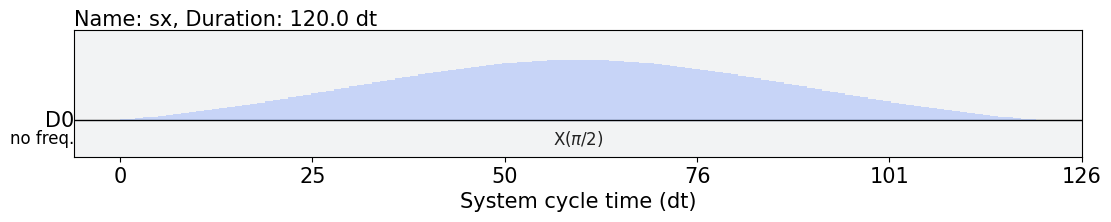

In [16]:
print(backend.target["sx"][(0, )].calibration)
backend.target["sx"][(0, )].calibration.draw()

ここでみてきたことがらは、BackendとTargetでできることのほんの一例に過ぎません。

さらに、[Qiskit Experiment](https://qiskit-extensions.github.io/qiskit-experiments/) を使えば、Qiskitを通して特性評価やキャリブレーション実験を行うことができますが、今回は扱いません。

## 付録 

Qiskit は、可視化機能が充実していることでも人気があります。回路の可視化、状態や分布の可視化、ターゲットデバイスの可視化ができます。回路の可視化、状態や分布の可視化は、このノートブックですでに使ってみたので、ターゲットデバイスの可視化の機能を以下で使ってみましょう。

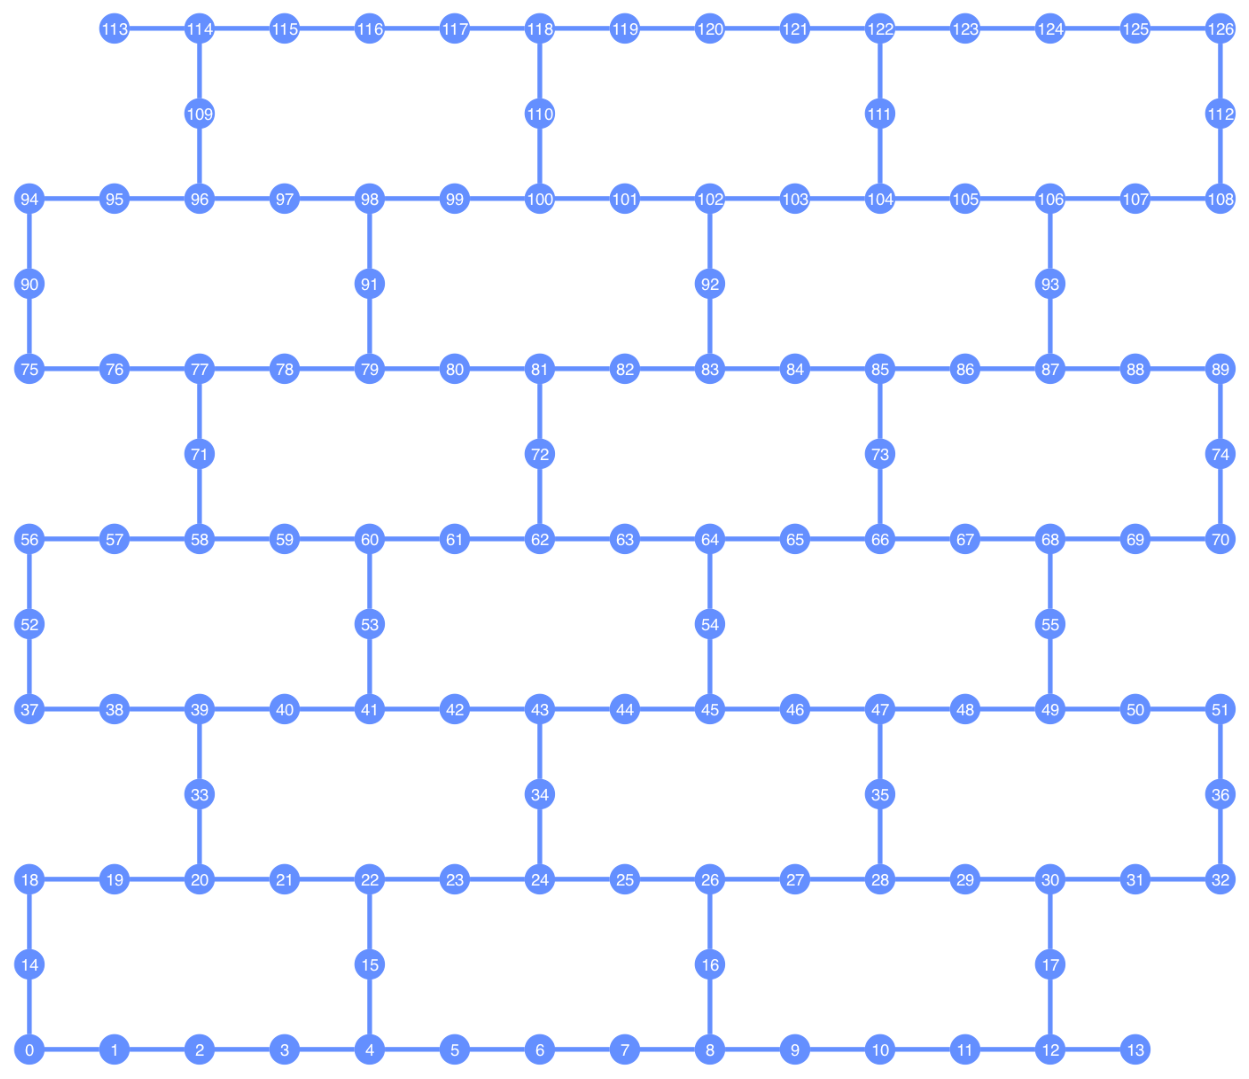

In [17]:
from qiskit.visualization import plot_gate_map

plot_gate_map(backend, font_size=14)

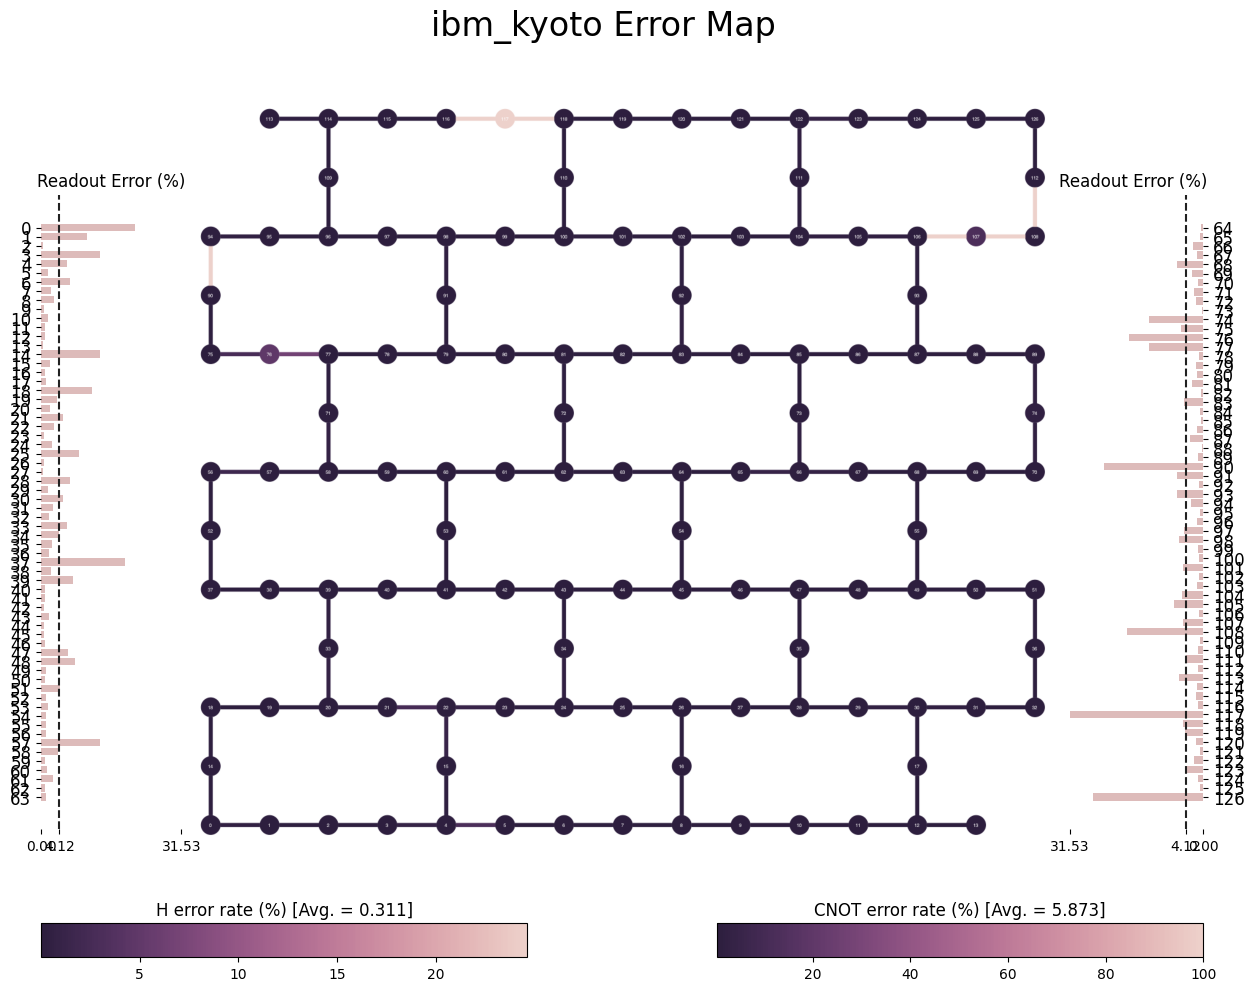

In [18]:
from qiskit.visualization import plot_error_map

plot_error_map(backend)

In [19]:
import qiskit
qiskit.__version__

'1.1.1'